# **Exploratory Data Analysis**

Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics, often with visual methods. It helps understand the data structure, detect patterns, spot anomalies, and generate insights before applying machine learning models.

Why is EDA Useful?

**Understanding Data Distribution** – Helps identify the range, central tendency (mean, median), and spread (variance, standard deviation) of features.

**Detecting Missing Values & Outliers** – Allows handling null values and extreme values that can affect model performance.

**Finding Relationships** – Identifies correlations between features, which can improve feature selection.

**Feature Engineering** – Helps in transforming or creating new features to improve predictive power.

**Choosing the Right Model** – By understanding data patterns, we can decide which models are best suited.

In [ ]:

# use df.sample(5) to get 5 random rows
# df.isna() and df.isnull() are same
# df.duplicated() is used to identify duplicate rows in a DataFrame.
# To remove duplicates, use: df.drop_duplicates()

| Feature        | `df.nunique()` | `df['column'].unique()` |
|---------------|--------------|----------------|
| Returns       | Count of unique values | Unique values (as an array) |
| Works on      | DataFrame & Series | Only Series |
| Output Type   | Integer (per column) | NumPy array |
| Use Case      | Count distinct values | Get the unique values themselves |


In [ ]:
# Sample Data Creation to work on

import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create a DataFrame with 10 columns and 40 rows
df = pd.DataFrame({
    'ID': np.arange(1, 41),  # Unique ID column
    'Age': np.random.randint(18, 60, 40),  # Random ages
    'Salary': np.append(np.random.randint(30000, 100000, 37), [500000, 600000, 700000]),  # Outliers added
    'Department': np.random.choice(['HR', 'IT', 'Finance', 'Marketing'], 40),  # Categorical variable
    'Experience': np.random.randint(1, 20, 40),  # Random years of experience
    'Score': np.append(np.random.uniform(1, 100, 37), [500, 600, 700]),  # Another outlier
    'JoinYear': np.random.randint(2000, 2023, 40),  # Year of joining
    'Performance': np.random.choice(['Excellent', 'Good', 'Average', 'Poor'], 40),  # Categorical
    'Satisfaction': np.random.uniform(1, 10, 40),  # Random float values
    'Bonus': np.random.randint(1000, 10000, 40)  # Bonus amount
})

# Introduce missing values (NaN) in numerical columns
for col in ['Salary', 'Experience', 'Score', 'Satisfaction']:
    df.loc[np.random.choice(df.index, size=5, replace=False), col] = np.nan

# Introduce missing values (NaN) in categorical columns
for col in ['Department', 'Performance']:
    df.loc[np.random.choice(df.index, size=4, replace=False), col] = np.nan  # 4 missing values

# Introduce duplicate rows
df = pd.concat([df, df.iloc[5:8]], ignore_index=True)  # Duplicating 3 rows

# Shuffle rows to make duplicates and NaNs non-contiguous
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display DataFrame
df.head(10)

# Save to CSV for further analysis
# df.to_csv("eda_dataset.csv", index=False)



,ID,Age,Salary,Department,Experience,Score,JoinYear,Performance,Satisfaction,Bonus
0,38,35,500000.0,HR,6.0,500.000000,2018,Good,2.525435,5146
1,25,39,NaN,Finance,10.0,55.736416,2015,Poor,9.585357,7971
2,26,42,42185.0,Finance,13.0,59.676976,2019,Good,9.233780,6625
3,37,56,97563.0,Finance,NaN,NaN,2002,Excellent,3.852298,1853
4,35,38,32568.0,Finance,NaN,80.036167,2008,Excellent,4.465880,7614
5,40,42,700000.0,IT,9.0,700.000000,2015,Poor,9.425393,1574
6,5,38,78555.0,Finance,7.0,17.660813,2018,Poor,6.114777,4863
7,13,57,70757.0,IT,NaN,71.514788,2007,Good,NaN,1784
8,9,28,99479.0,Finance,NaN,NaN,2006,Average,3.195907,4009
9,4,25,53483.0,Finance,14.0,25.168427,2003,Good,6.918516,3733


# Dealing with Missing Values  

In [ ]:
df.shape

(43, 10)

In [ ]:
df.isnull().sum()

,0
ID,0
Age,0
Salary,6
Department,5
Experience,5
Score,6
JoinYear,0
Performance,4
Satisfaction,6
Bonus,0


In [ ]:
#1. We can drop the entire col if the data is large and there are many Null values with: df.drop("col_name", axis=1, inplace=True)
#2. Delete the rows with missing values with: df.dropna(inplace=True)

#3. Data Imputation with mean, or median for numerical data
salary_mean=df['Salary'].mean()
df['Salary'].fillna(salary_mean, inplace=True)
# df['Salary'].isnull().sum()    --> gives 0

#4. for categorical data: use mode
df['Department'].fillna(df['Department'].mode()[0],inplace=True)
# or use :   df['Department'].fillna("Not Disclosed",inplace=True)


<ipython-input-22-f47e4067c123>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(salary_mean, inplace=True)


In [ ]:
#5. Advanced imputation:

'''Interpolation is a technique used to estimate missing values based on surrounding data points.
 The interpolate() method in Pandas is mainly used for numerical columns, and it fills missing values (NaN)
 using different interpolation methods. Only works for numerical data.
If data is randomly missing (not sequential), interpolation might not make sense.

 Method='linear': Default method; fills missing values by computing a  straight-line value between existing points. Method can be linear , polynomial, time series. '''



df['Score'].interpolate(method='linear', inplace=True)


<ipython-input-25-cfb60c9bbbeb>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Score'].interpolate(method='linear', inplace=True)


# Dealing with Duplicate values

In [ ]:
import pandas as pd

# Creating a sample DataFrame with duplicates
data = {
    'ID': [1, 2, 2, 3, 4, 4, 4, 5],
    'Name': ['Alice', 'Bob', 'Bob', 'Charlie', 'David', 'David', 'David', 'Eve'],
    'Score': [90, 85, 85, 78, 92, 92, 92, 88]
}

df = pd.DataFrame(data)
df


,ID,Name,Score
0,1,Alice,90
1,2,Bob,85
2,2,Bob,85
3,3,Charlie,78
4,4,David,92
5,4,David,92
6,4,David,92
7,5,Eve,88


In [ ]:
df.duplicated().sum()

3

In [ ]:
df.drop_duplicates(inplace=True) # remove duplicate rows

In [ ]:
# Identify Duplicates (gives extra rows keeping one row in the data)
print("\nDuplicated Rows:")
print(df[df.duplicated()])


Duplicated Rows:
   ID   Name  Score
2   2    Bob     85
5   4  David     92
6   4  David     92


In [ ]:
# Merge Similar Rows (Group by ID and aggregate)
df_grouped = df.groupby(['ID', 'Name'], as_index=False).agg({'Score': 'mean'}) # mean can be sum, max,min etc
df_grouped

,ID,Name,Score
0,1,Alice,90.0
1,2,Bob,85.0
2,3,Charlie,78.0
3,4,David,92.0
4,5,Eve,88.0


In [ ]:
df.duplicated('Name').sum()

3

In [ ]:
df.drop_duplicates('Name', inplace=True,keep='last') # keep= False deletes all the duplicated rows

# Dealing Outliers

Outliers are extreme values that differ significantly from the rest of the data. Outliers can skew the mean, making it misleading. Median is unaffected by outliers.

1. Trimming (Winsorizing): Remove outliers
2. Clipping (Capping): Instead of removing outliers, clipping limits extreme values to a threshold.
All values above the upper bound are set to the upper bound.
All values below the lower bound are set to the lower bound.






🔹 When to Keep Outliers?

✅ If outliers represent real phenomena (e.g., fraud detection, rare diseases, financial crashes).

✅ If they provide valuable insights rather than errors.

In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate normal weight and age values
weights = np.random.normal(loc=70, scale=10, size=200).tolist()  # Mean 70kg, Std 10
ages = np.random.normal(loc=35, scale=5, size=200).tolist()  # Mean 35 years, Std 5

# Introduce some outliers
weights.extend([150, 2, 120,200,300,1,3,4,450,1000])  # Extreme weights
ages.extend([80, 1, 90,2,100,200,300,130,1000,450])  # Extreme ages

# Create DataFrame
df = pd.DataFrame({'Weight (kg)': weights, 'Age (years)': ages})

df.head()


,Weight (kg),Age (years)
0,74.967142,36.788937
1,68.617357,37.803923
2,76.476885,40.415256
3,85.230299,40.269010
4,67.658466,28.111653


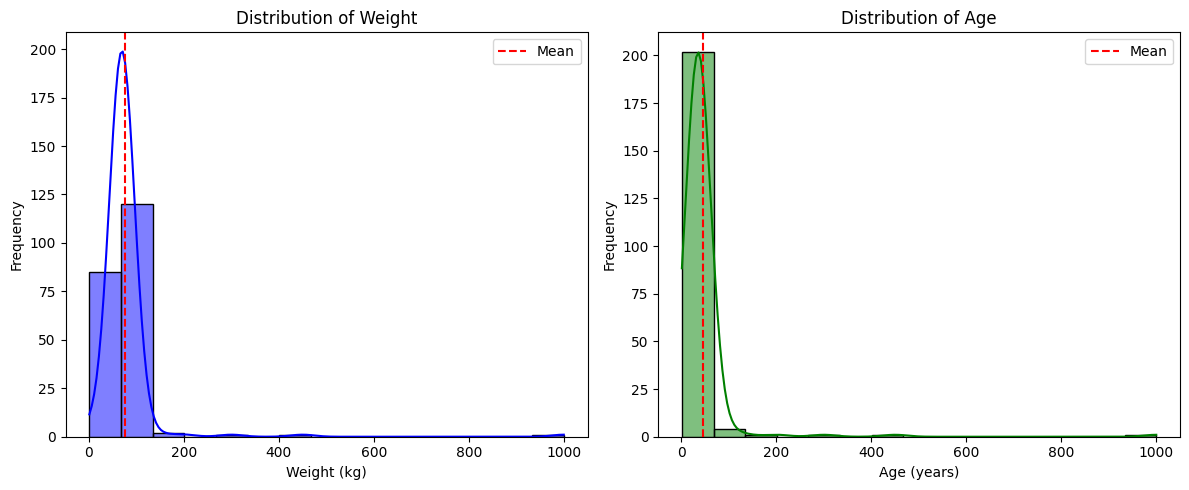

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Weight Distribution
plt.subplot(1, 2, 1)
sns.histplot(df["Weight (kg)"], bins=15, kde=True, color="blue")
plt.axvline(df["Weight (kg)"].mean(), color='red', linestyle='dashed', label="Mean")
plt.title("Distribution of Weight")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.legend()

# Age Distribution
plt.subplot(1, 2, 2)
sns.histplot(df["Age (years)"], bins=15, kde=True, color="green")
plt.axvline(df["Age (years)"].mean(), color='red', linestyle='dashed', label="Mean")
plt.title("Distribution of Age")
plt.xlabel("Age (years)")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

### Using  Z-Score (Trimming)

In [ ]:
# 1. Using Z-score (Trimming)

# Z-score tells how far a value is from the mean in terms of standard deviations.
# Outliers are typically defined as values with a Z-score greater than 3 or less than -3. (+/- 3 Standard Deviation)


from scipy.stats import zscore
z_scores = np.abs(zscore(df))

# trim the outliers
threshold = 3
# Remove outliers (keep only rows where NO column exceeds threshold)
df_no_outliers = df[(z_scores <= threshold).all(axis=1)]
# Get only the outlier rows (if any column exceeds the threshold)
df_outliers = df[(z_scores > threshold).any(axis=1)]

print("Data without outliers:")
print(df_no_outliers)

print("\nDetected Outliers:")
print(df_outliers)


Data without outliers:
     Weight (kg)  Age (years)
0      74.967142    36.788937
1      68.617357    37.803923
2      76.476885    40.415256
3      85.230299    40.269010
4      67.658466    28.111653
..           ...          ...
201     2.000000     1.000000
202   120.000000    90.000000
203   200.000000     2.000000
205     1.000000   200.000000
207     4.000000   130.000000

[206 rows x 2 columns]

Detected Outliers:
     Weight (kg)  Age (years)
204        300.0        100.0
206          3.0        300.0
208        450.0       1000.0
209       1000.0        450.0


<Axes: ylabel='Count'>

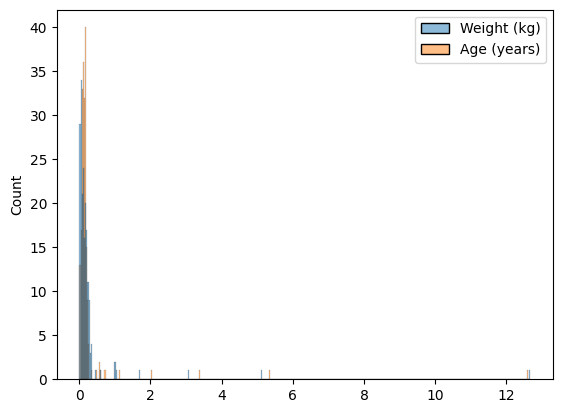

In [ ]:
sns.histplot(z_scores)

In [ ]:
# or calculate mean and sd

mean_weight = df['Weight (kg)'].mean()
std_weight = df['Weight (kg)'].std()
mean_age = df['Age (years)'].mean()
std_age = df['Age (years)'].std()

max_age=mean_age+3*std_age
min_age=mean_age-3*std_age
max_weight=mean_weight+3*std_weight
min_weight=mean_weight-3*std_weight

df_no_outliers=df[(df['Age (years)']<=max_age) &
                  (df['Age (years)']>=min_age) &
                   (df['Weight (kg)']<=max_weight) &
                    (df['Weight (kg)']>=min_weight)]
df_outliers = df.drop(df_no_outliers.index)

In [ ]:
# another method
df_no_outliers = df[
    df['Age (years)'].between(min_age, max_age) &
    df['Weight (kg)'].between(min_weight, max_weight)
]

In [ ]:
df_outliers

,Weight (kg),Age (years)
204,300.0,100.0
206,3.0,300.0
208,450.0,1000.0
209,1000.0,450.0


### Using Z-Score (Clapping)

In [ ]:
# set outliers to max_age,min_age,max_weight,min_weight

df['Age (years)'] = df['Age (years)'].clip(lower=min_age, upper=max_age)
df['Weight (kg)'] = df['Weight (kg)'].clip(lower=min_weight, upper=max_weight)

#Less than min_value → set to min_value
# Greater than max_value → set to max_value

### Using IQR

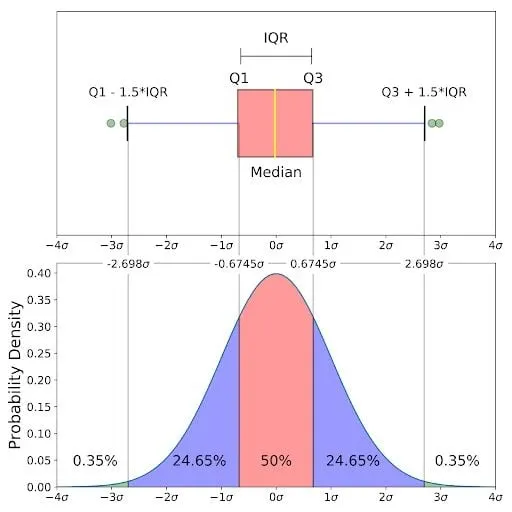

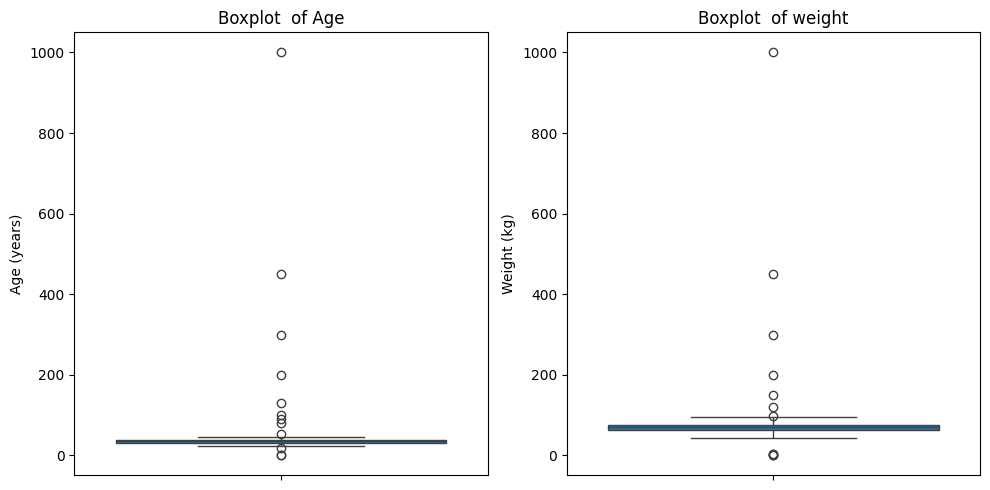

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(df['Age (years)'])
plt.title("Boxplot  of Age")

plt.subplot(1, 2, 2)
sns.boxplot(df['Weight (kg)'])
plt.title("Boxplot  of weight")
plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,Weight (kg),Age (years)
count,210.000000,210.000000
mean,76.897419,44.946991
std,72.992145,75.948561
min,1.000000,1.000000
25%,62.815290,31.999946
50%,70.090577,35.527984
75%,75.757828,39.037811
max,1000.000000,1000.000000


In [ ]:
# Compute Q1, Q3, and IQR
# calculates percentiles separately for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


print('Q1\n',Q1)
print('Q3\n',Q3)
print('IQR\n',IQR)
print('Lower Bound\n',lower_bound)
print('Upper Bound\n',upper_bound)

Q1
 Weight (kg)    62.815290
Age (years)    31.999946
Name: 0.25, dtype: float64
Q3
 Weight (kg)    75.757828
Age (years)    39.037811
Name: 0.75, dtype: float64
IQR
 Weight (kg)    12.942538
Age (years)     7.037865
dtype: float64
Lower Bound
 Weight (kg)    43.401482
Age (years)    21.443148
dtype: float64
Upper Bound
 Weight (kg)    95.171636
Age (years)    49.594609
dtype: float64


In [ ]:
# Trimming

df_trimmed = df[(df >= lower_bound) & (df <= upper_bound)].dropna()
#applies the respective lower and upper bounds for each column separately because lower_bound and upper_bound are computed using df.quantile(), which operates column-wise.


<Axes: ylabel='Age (years)'>

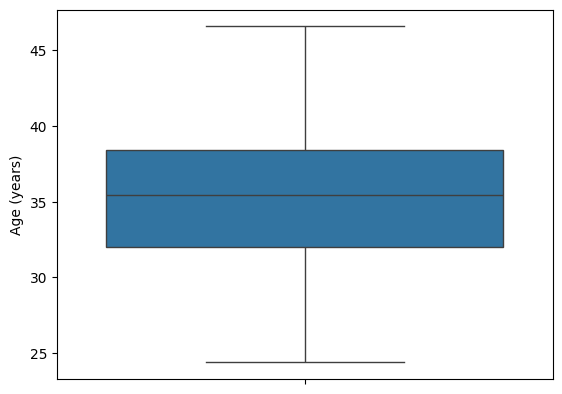

In [ ]:
sns.boxplot(df_trimmed['Age (years)'])

In [ ]:
# Clipping

df_clipped = df.clip(lower=lower_bound, upper=upper_bound, axis=1)

<Axes: ylabel='Age (years)'>

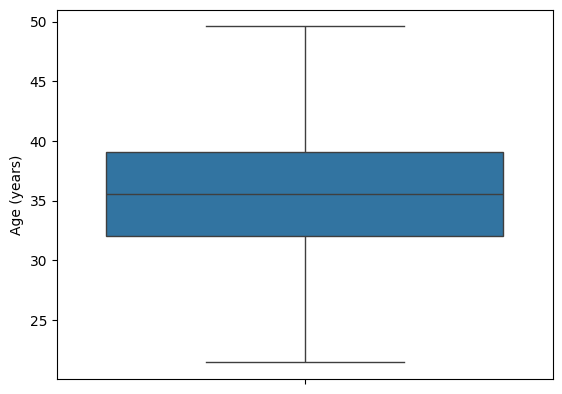

In [ ]:
sns.boxplot(df_clipped['Age (years)'])

### Using Percentiles

In [ ]:
# instead of Q1-1.5IOR and Q3+1.5IQR use 1 and 99 percentile

upper_bound=df.quantile(0.99)
lower_bound=df.quantile(0.01)

# Checking Data Type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Weight (kg)  210 non-null    float64
 1   Age (years)  210 non-null    float64
dtypes: float64(2)
memory usage: 3.4 KB


In [ ]:
df.dtypes

,0
Weight (kg),float64
Age (years),float64


In [ ]:
import pandas as pd

# Sample Data
df = pd.DataFrame({
    'Age': ['25', '30', '35'],    # Strings
    'Height': [5.5, 6.0, 5.8],    # Floats
    'Is_Student': ['True', 'False', 'False']  # Strings
})

print("\nBefore Conversion:\n", df.dtypes)

# Convert 'Age' from string to integer
df['Age'] = df['Age'].astype(int)

# Convert 'Height' from float to integer
df['Height'] = df['Height'].astype(int)

# Convert 'Is_Student' from string to boolean
df['Is_Student'] = df['Is_Student'].astype(bool)

print("\nAfter Conversion:\n", df.dtypes)



Before Conversion:
 Age            object
Height        float64
Is_Student     object
dtype: object

After Conversion:
 Age           int64
Height        int64
Is_Student     bool
dtype: object


In [ ]:
#If a column cannot be converted (e.g., "abc" cannot become an integer), use errors='coerce' to replace invalid values with NaN:

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


# Data Visualizations

In [1]:
# value_counts is primarily used for categorical values
import numpy as np
import pandas as pd

df = pd.DataFrame({'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female',"Lesbian",'Gay','Gay','Lesbian',"Gay",'Male']})
df['Gender'].value_counts()

,count
Gender,
Male,4
Female,3
Gay,3
Lesbian,2


In [2]:
df['Gender'].value_counts(normalize=True) # gives percentage of value counts

,proportion
Gender,
Male,0.333333
Female,0.250000
Gay,0.250000
Lesbian,0.166667


In [3]:
# for numerical

df=pd.DataFrame({"Age":[10,11,2,55,67,32,12,67,11,23,45]})
df['Age'].value_counts(bins=4) # gives intervel wise

,count
"(1.9340000000000002, 18.25]",5
"(50.75, 67.0]",3
"(18.25, 34.5]",2
"(34.5, 50.75]",1


In [4]:
bins=(0,10,20,30,100)
df["Age"].value_counts(bins=bins)

,count
"(30.0, 100.0]",5
"(10.0, 20.0]",3
"(-0.001, 10.0]",2
"(20.0, 30.0]",1


In [9]:
print(df['Age'].mean(),
df['Age'].std(),
df['Age'].median(),
df["Age"].kurt(),
df['Age'].skew())

30.454545454545453 24.225456182964383 23.0 -1.3926493089063308 0.5369973222903442


In [10]:
df.corr() # correlation matrix

,Age
Age,1.0


### Univariate Analysis (single feature/ variable) on Categorical Data

In [1]:
import pandas as pd
import numpy as np

# Generate random categorical data
np.random.seed(42)  # For reproducibility
remarks_categories = ['Good', 'Average', 'Excellent', 'Poor', 'Satisfactory']

df = pd.DataFrame({
    'Id': range(1, 21),  # IDs from 1 to 20
    'Remarks': np.random.choice(remarks_categories, 20)  # Random remarks
})

df.head()

,Id,Remarks
0,1,Poor
1,2,Satisfactory
2,3,Excellent
3,4,Satisfactory
4,5,Satisfactory


In [3]:
df['Remarks'].value_counts()

,count
Remarks,
Satisfactory,6
Poor,5
Excellent,5
Average,3
Good,1


<Axes: xlabel='Remarks', ylabel='count'>

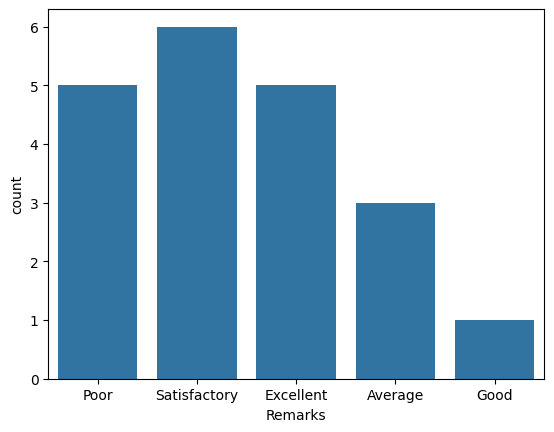

In [16]:
import seaborn as sns
sns.countplot(df,x="Remarks")

In [19]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Define categories
cities = ['New York', 'Los Angeles', 'Chicago', 'Miami', 'San Francisco']
room_types = ['Single', 'Double', 'Deluxe']

# Create DataFrame
df = pd.DataFrame({
    'City': np.random.choice(cities, 20),
    'Hotel Room Type': np.random.choice(room_types, 20)
})

df.head()

,City,Hotel Room Type
0,Miami,Double
1,San Francisco,Double
2,Chicago,Single
3,San Francisco,Single
4,San Francisco,Single


<Axes: xlabel='City', ylabel='count'>

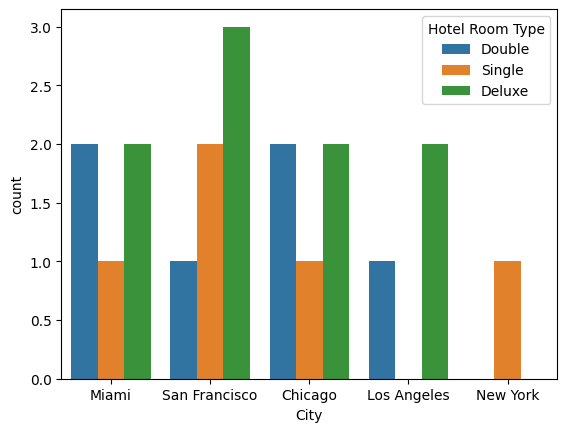

In [20]:
sns.countplot(df,x='City',hue='Hotel Room Type')

<Axes: ylabel='count'>

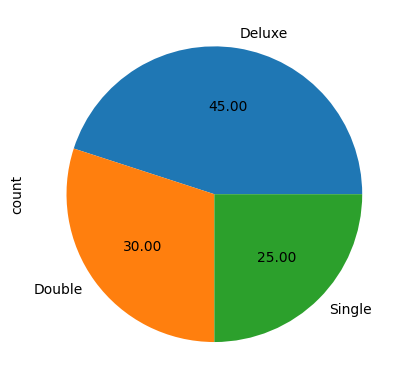

In [24]:
# pie chart

df['Hotel Room Type'].value_counts().plot(kind='pie',autopct='%.2f') # percentage of each hotel across all cities

<Axes: ylabel='count'>

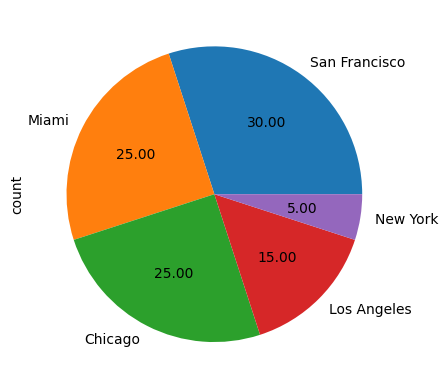

In [25]:
df['City'].value_counts().plot(kind='pie',autopct='%.2f') # percentage number of hotels in each city

In [26]:
import pandas as pd

# Creating a sample Titanic dataset
data = {
    'PassengerId': range(1, 21),  # 20 sample passengers
    'Survived': ['Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
                 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes'],
    'Pclass': ['1st', '3rd', '3rd', '1st', '2nd', '3rd', '1st', '2nd', '3rd', '1st',
               '2nd', '3rd', '1st', '3rd', '2nd', '3rd', '1st', '2nd', '3rd', '1st'],
    'Sex': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
            'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Age': [22, 38, 26, 35, 30, 40, 19, 58, 22, 31,
            25, 45, 54, 2, 27, 14, 50, 36, 42, 29],
    'Embarked': ['S', 'C', 'S', 'S', 'C', 'Q', 'S', 'S', 'C', 'Q',
                 'S', 'C', 'S', 'Q', 'C', 'S', 'S', 'C', 'S', 'Q']
}

# Create DataFrame
df = pd.DataFrame(data)
df.head()



,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,Yes,1st,Male,22,S
1,2,No,3rd,Female,38,C
2,3,No,3rd,Male,26,S
3,4,Yes,1st,Female,35,S
4,5,Yes,2nd,Male,30,C


<Axes: xlabel='Survived', ylabel='count'>

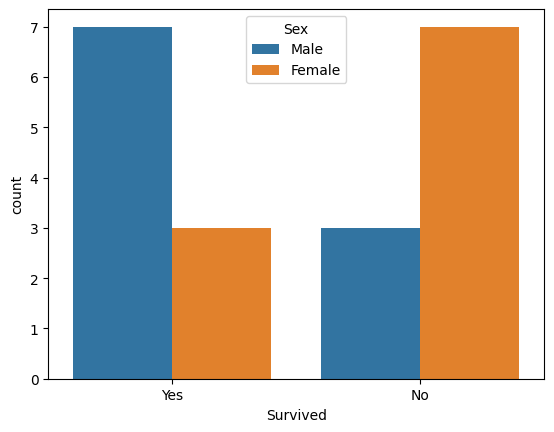

In [28]:
sns.countplot(df,x='Survived',hue='Sex')

<Axes: xlabel='Pclass', ylabel='count'>

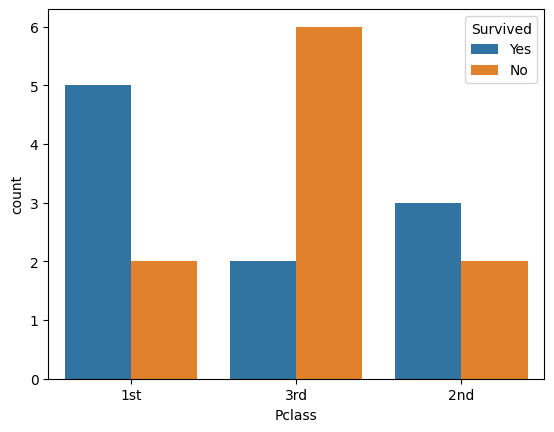

In [29]:
sns.countplot(df,x='Pclass',hue='Survived')

### Univariate Analysis (single feature/ variable) on Numerical Data

<Axes: xlabel='Age', ylabel='Count'>

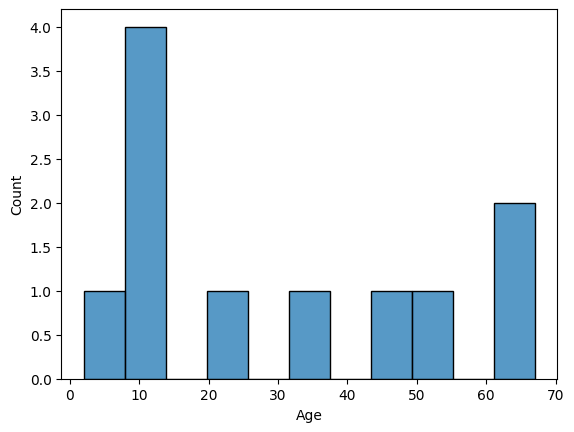

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns

df=pd.DataFrame({"Age":[10,11,2,55,67,32,12,67,11,23,45]})
sns.histplot(df,x="Age",bins=11)

<Axes: xlabel='Age', ylabel='Count'>

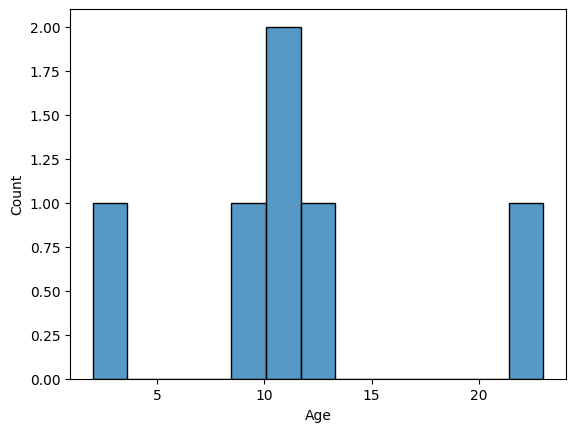

In [37]:
sns.histplot(data=df[df['Age']<30],x='Age')

<ipython-input-40-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

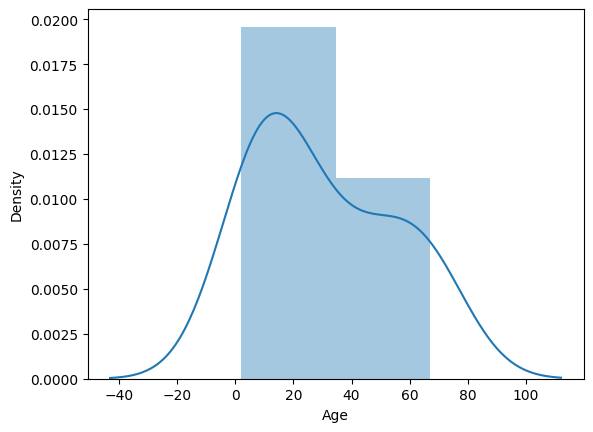

In [40]:
sns.distplot(df['Age'])

<Axes: ylabel='Age'>

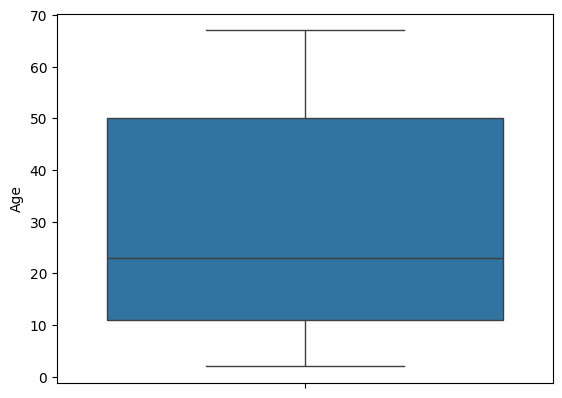

In [41]:
sns.boxplot(df['Age'])

<Axes: ylabel='Age'>

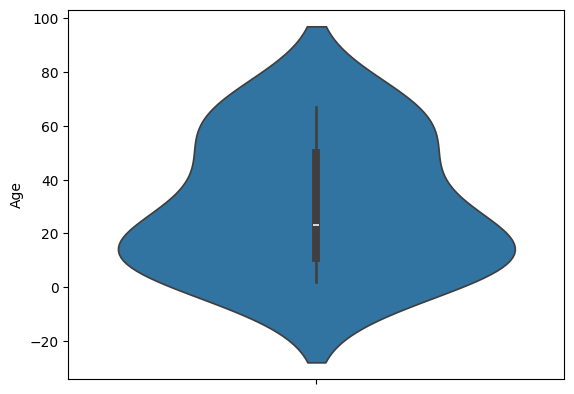

In [42]:
sns.violinplot(df['Age']) # similar to boxplot gives in the form of distribution

### Bivariate Analysis (categorical vs numerical)

In [44]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='class', ylabel='age'>

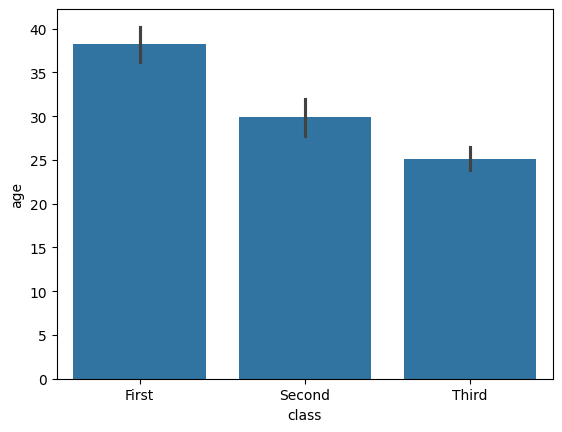

In [46]:
# categorical vs numerical

sns.barplot(x='class',y='age',data=df) # default estimator  is mean i.e gives mean age for diffenet classes

<Axes: xlabel='class', ylabel='fare'>

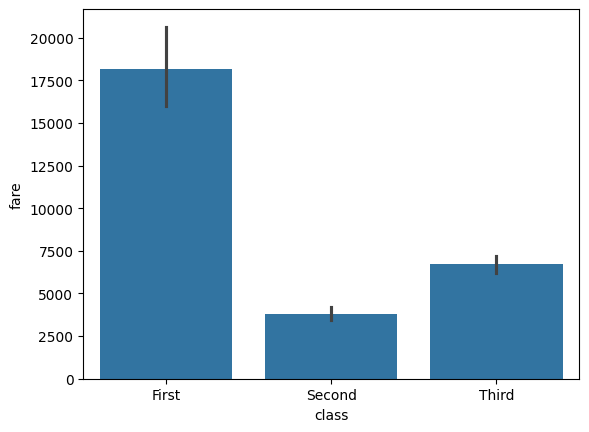

In [50]:
sns.barplot(data=df,y="fare",x='class',estimator='sum') # total sum of each class

<Axes: xlabel='class', ylabel='age'>

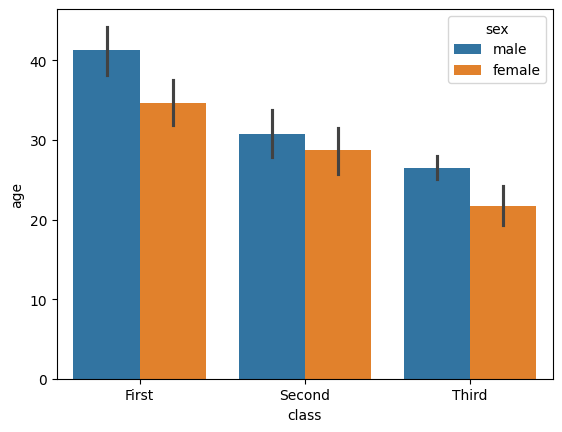

In [55]:
sns.barplot(data=df,x='class',y='age',hue='sex')

<Axes: xlabel='class', ylabel='age'>

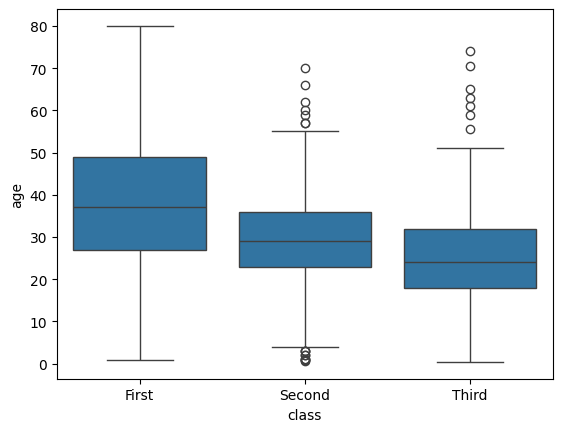

In [56]:
sns.boxplot(data=df,y='age',x='class') # over different classes

<Axes: xlabel='class', ylabel='age'>

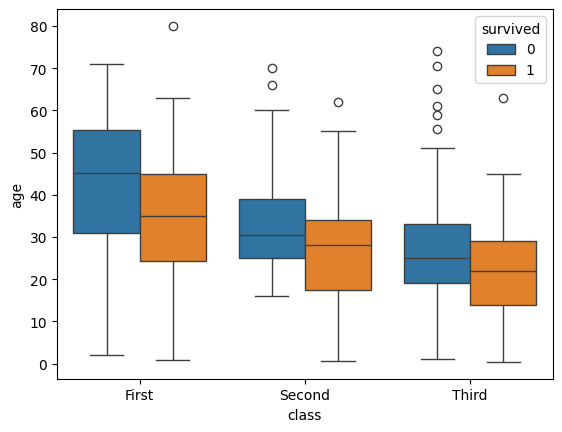

In [60]:
sns.boxplot(data=df,y='age',x='class',hue='survived') # over more different classes

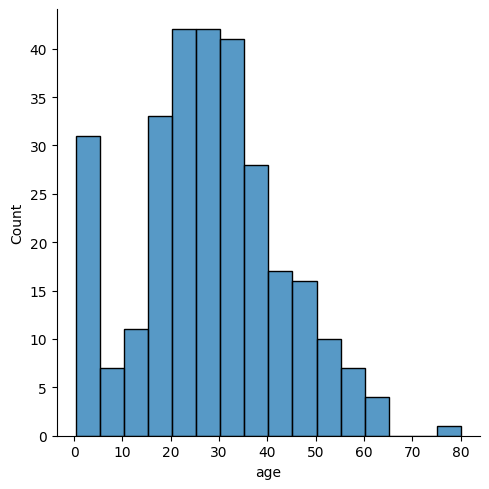

In [62]:
sns.displot(df[df['survived']==1]['age'])

###  Bivariate Analysis (categorical)

In [66]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [69]:
# crosstab:

#A contingency table (or cross-tabulation) helps summarize the frequency of two categorical variables.

x=pd.crosstab(df['class'],df['survived'])
x

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


<Axes: xlabel='survived', ylabel='class'>

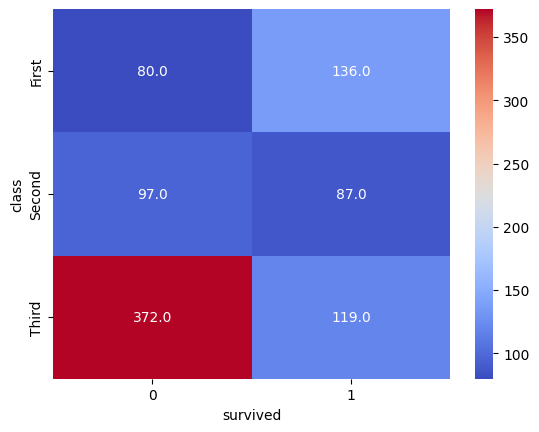

In [77]:
# heatmap

sns.heatmap(x,annot=True,fmt="0.1f",cmap='coolwarm')

<Axes: xlabel='survived', ylabel='age'>

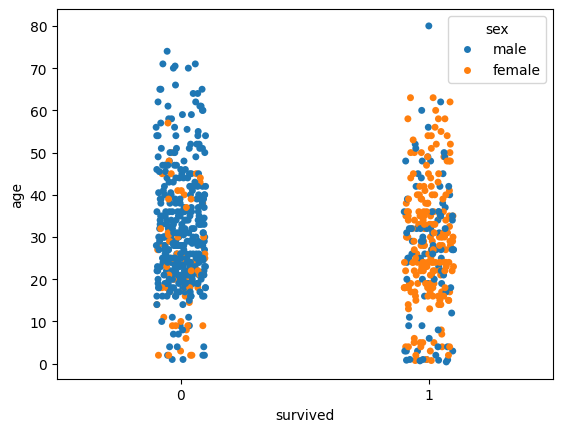

In [79]:
#sns.barplot(data=df,x='survived',y='age',hue='sex') # 2 categorical and 1 numerical

sns.stripplot(data=df,x='survived',y='age',hue='sex') # how the data is distributed

In [81]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: >

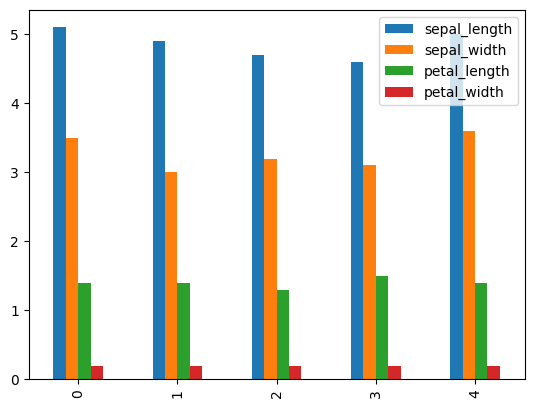

In [82]:
df.head().plot(kind='bar') # for 1st five rows

<Axes: >

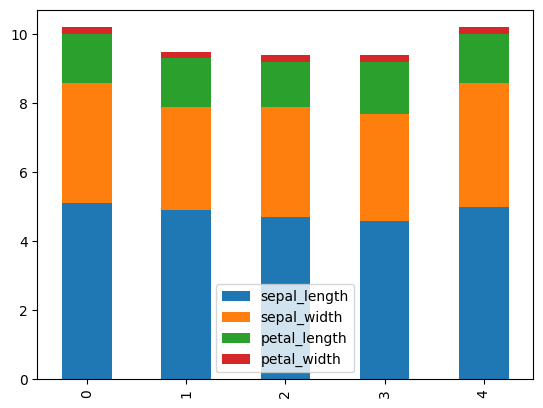

In [86]:
df.head().plot(kind='bar',stacked=True) # for 1st five rows

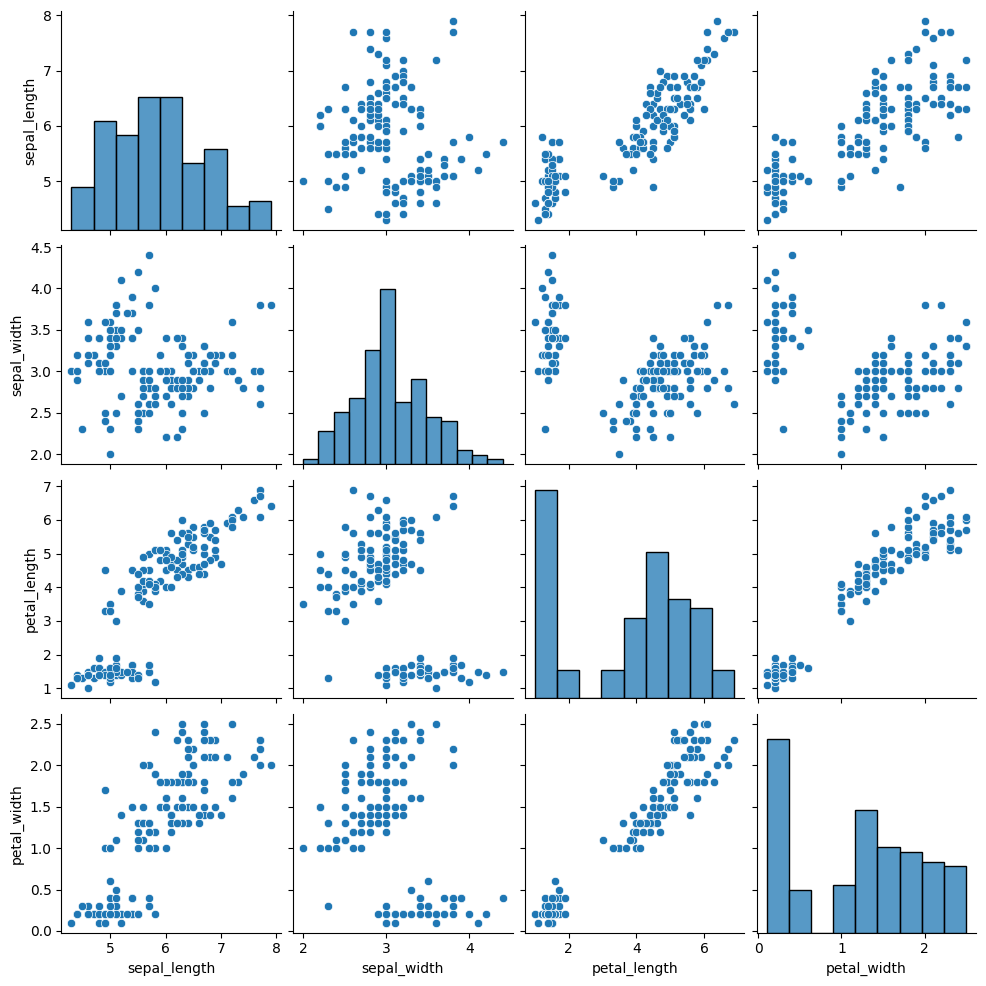

In [87]:
sns.pairplot(df)